<a href="https://colab.research.google.com/github/acafiero/sports-project2/blob/main/Cafiero_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score, classification_report, confusion_matrix

 ## *Dataset*
 1) github / Five Thirty Eight

 2) statistical data for modern NBA players

 3) What is the statiscal threshold of WAR and RAPTOR a player needs to reach to be worth signing

 4) Regression

 5) 21 features

 6) 4078 rows

 7) There are multiple entries for the same player that needed to be reduced and averaged out, several features that are redudant to the study and an excess of negative floats that could inaccurately affect the outcome

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
url = 'https://raw.githubusercontent.com/acafiero/sports-project2/main/modern_RAPTOR_by_player.csv'
df = pd.read_csv(url)
df.head()

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Quincy Acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,-1.565257,-0.216477,-1.781734,0.415918,0.415918,0.000000,-1.464417,-0.223754,-1.688171,-0.554898


In [4]:
dfml = pd.DataFrame()
players = df['player_name'].unique()

In [5]:
players

for player in players:
  player_df = df.loc[df['player_name'] == player]
  player_df['Next WAR'] = player_df['war_total'].shift(-1)
  dfml = pd.concat([dfml, player_df])

dfml.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,Next WAR
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413,0.777304
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141,0.178167
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013,NaN
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157,NaN
4,Quincy Acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,-0.216477,-1.781734,0.415918,0.415918,0.000000,-1.464417,-0.223754,-1.688171,-0.554898,-0.083313


In [6]:
dfml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4079 entries, 0 to 4078
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   player_name           4079 non-null   object 
 1   player_id             4079 non-null   object 
 2   season                4079 non-null   int64  
 3   poss                  4079 non-null   int64  
 4   mp                    4079 non-null   int64  
 5   raptor_box_offense    4078 non-null   float64
 6   raptor_box_defense    4078 non-null   float64
 7   raptor_box_total      4078 non-null   float64
 8   raptor_onoff_offense  4078 non-null   float64
 9   raptor_onoff_defense  4078 non-null   float64
 10  raptor_onoff_total    4078 non-null   float64
 11  raptor_offense        4079 non-null   float64
 12  raptor_defense        4079 non-null   float64
 13  raptor_total          4079 non-null   float64
 14  war_total             4079 non-null   float64
 15  war_reg_season       

In [7]:
dfml.duplicated().sum()

## no duplicated values

0

In [8]:
dfml.nunique()

## checking all the various features

player_name             1192
player_id               1187
season                     8
poss                    2867
mp                      2130
raptor_box_offense      4078
raptor_box_defense      4078
raptor_box_total        4078
raptor_onoff_offense    4077
raptor_onoff_defense    4077
raptor_onoff_total      4077
raptor_offense          4079
raptor_defense          4079
raptor_total            4079
war_total               4079
war_reg_season          4075
war_playoffs            1717
predator_offense        4079
predator_defense        4079
predator_total          4079
pace_impact             4078
Next WAR                2887
dtype: int64

In [9]:
dfml.isna().sum()

## checking for rows missing data

player_name                0
player_id                  0
season                     0
poss                       0
mp                         0
raptor_box_offense         1
raptor_box_defense         1
raptor_box_total           1
raptor_onoff_offense       1
raptor_onoff_defense       1
raptor_onoff_total         1
raptor_offense             0
raptor_defense             0
raptor_total               0
war_total                  0
war_reg_season             0
war_playoffs               0
predator_offense           0
predator_defense           0
predator_total             0
pace_impact                1
Next WAR                1192
dtype: int64

In [10]:
dfml.dropna()
dfml.isna().sum()

## dropped all rows missing values from the dataframe

player_name                0
player_id                  0
season                     0
poss                       0
mp                         0
raptor_box_offense         1
raptor_box_defense         1
raptor_box_total           1
raptor_onoff_offense       1
raptor_onoff_defense       1
raptor_onoff_total         1
raptor_offense             0
raptor_defense             0
raptor_total               0
war_total                  0
war_reg_season             0
war_playoffs               0
predator_offense           0
predator_defense           0
predator_total             0
pace_impact                1
Next WAR                1192
dtype: int64

In [11]:
dfml.dropna()
dfml

,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,...,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact,Next WAR
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,...,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413,0.777304
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,...,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141,0.178167
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,...,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013,NaN
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,...,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157,NaN
4,Quincy Acy,acyqu01,2014,1716,847,-1.716079,0.133115,-1.582964,-0.324811,-1.661495,...,-0.216477,-1.781734,0.415918,0.415918,0.000000,-1.464417,-0.223754,-1.688171,-0.554898,-0.083313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,Ivica Zubac,zubaciv01,2017,1305,609,-3.320225,-2.901762,-6.221987,-2.791027,-3.138553,...,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,-3.533604,-2.932103,-6.465707,0.644128,0.531968
4075,Ivica Zubac,zubaciv01,2018,871,410,-2.581325,1.643240,-0.938084,-3.444739,6.249652,...,2.688832,-0.214877,0.531968,0.531968,0.000000,-2.616331,0.752875,-1.863456,0.311576,1.217134
4076,Ivica Zubac,zubaciv01,2019,2345,1079,-2.336006,1.400274,-0.935733,-1.757992,3.051059,...,1.813768,-0.548676,1.217134,1.114995,0.102138,-2.810283,1.157824,-1.652459,0.077074,6.224207
4077,Ivica Zubac,zubaciv01,2020,3447,1646,0.516422,3.529428,4.045850,3.314971,2.963001,...,3.549458,4.649308,6.224207,5.020903,1.203304,-0.310842,3.331974,3.021132,-0.410164,4.261327


In [12]:
dfml.isna().sum()

player_name                0
player_id                  0
season                     0
poss                       0
mp                         0
raptor_box_offense         1
raptor_box_defense         1
raptor_box_total           1
raptor_onoff_offense       1
raptor_onoff_defense       1
raptor_onoff_total         1
raptor_offense             0
raptor_defense             0
raptor_total               0
war_total                  0
war_reg_season             0
war_playoffs               0
predator_offense           0
predator_defense           0
predator_total             0
pace_impact                1
Next WAR                1192
dtype: int64

In [13]:
dfml.drop(['player_name', 'player_id', 'season', 'raptor_box_offense', 'raptor_box_defense', 'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_offense', 'raptor_defense', 'raptor_box_total', 'war_reg_season', 'war_playoffs', 'predator_offense', 'predator_defense'], axis=1, inplace=True)
dfml.head()

,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact,Next WAR
0,2387,1135,-4.275564,-0.601411,1.249008,-0.961575,0.326413,0.777304
1,2546,1244,-1.341421,-1.523468,0.777304,-1.287247,-0.456141,0.178167
2,1279,588,-1.257688,-2.154538,0.178167,-3.034396,-0.268013,NaN
3,1581,749,-4.970491,-3.392775,-0.246055,-3.342885,0.329157,NaN
4,1716,847,-1.986306,-1.781734,0.415918,-1.688171,-0.554898,-0.083313


In [14]:
dfml = dfml.loc[dfml['war_total'] >= 1]
dfml = dfml.loc[dfml['predator_total'] >= 1]
dfml = dfml.loc[dfml['raptor_total'] >= 1]
dfml = dfml.loc[dfml['pace_impact'] >= 1]
dfml = dfml.loc[dfml['Next WAR'] >= 1]
dfml

,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact,Next WAR
127,6265,2872,5.543546,6.806518,14.269861,7.083689,1.319042,13.149613
128,4894,2194,9.090994,8.778267,13.149613,7.521699,1.799512,13.666796
160,6225,3130,2.318868,2.146961,8.034787,2.400297,1.319376,7.993878
272,6871,3415,2.518748,2.140857,8.669646,3.200148,1.108855,4.220007
309,6485,3028,1.107369,3.374096,9.580186,3.724767,1.283573,4.656472
...,...,...,...,...,...,...,...,...
3875,6533,3149,8.175709,4.429313,11.841404,5.656411,2.941962,6.142006
3876,6169,2827,0.451285,1.431787,6.142006,2.696536,2.660690,2.127703
3948,4821,2266,3.572633,3.677213,7.619304,2.484788,1.523881,6.274484
3949,5489,2589,1.722066,1.882814,6.274484,1.759520,2.511937,4.286623


In [15]:
dfml.dropna(subset=['Next WAR'], inplace = True)
dfml.isna().sum()

poss                  0
mp                    0
raptor_onoff_total    0
raptor_total          0
war_total             0
predator_total        0
pace_impact           0
Next WAR              0
dtype: int64

In [16]:
## label each part of project (headers and maybe some info)
## include more comments for what I decided to do

In [17]:
dfml.describe().round(2)

,poss,mp,raptor_onoff_total,raptor_total,war_total,predator_total,pace_impact,Next WAR
count,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00
mean,5075.32,2424.98,4.24,4.71,9.79,5.08,1.64,8.78
std,1728.05,837.47,3.61,2.52,5.60,2.60,0.63,5.77
min,841.00,381.00,-3.30,1.11,1.13,1.13,1.00,1.58
25%,4043.00,1958.00,1.86,2.53,5.41,2.72,1.21,4.30
50%,5515.00,2589.00,3.88,4.35,8.67,5.19,1.40,7.78
75%,6486.50,3108.00,6.62,6.58,13.11,6.82,1.92,12.08
max,7947.00,3937.00,15.23,12.49,26.67,13.35,4.00,26.67


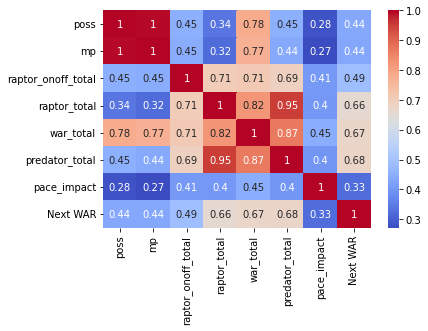

In [18]:
corr = dfml.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot = True)

## we can see WAR, PREDATOR, total RAPTOR and Pace Impact have a fairly close correlations

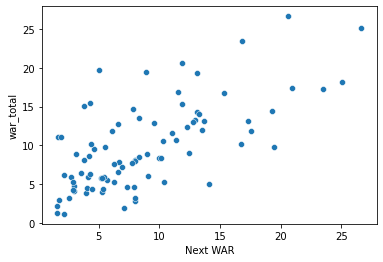

In [19]:
sns.scatterplot(data=dfml, x='Next WAR', y='war_total', legend = False)
## include title and some text about what this means

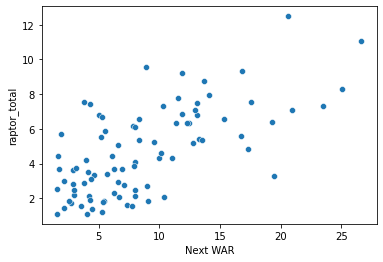

In [20]:
sns.scatterplot(data=dfml, x='Next WAR', y='raptor_total', legend = False)
## include title and some text about what this means

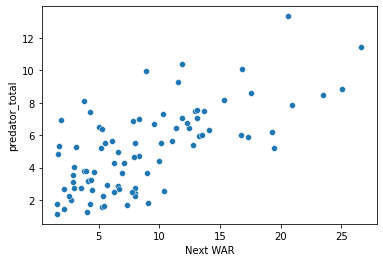

In [21]:
#@title
sns.scatterplot(data=dfml, x='Next WAR', y='predator_total', legend = False)

## there are several distinct outliers that give us a better picture of who could be our ideal player

In [22]:
maxWAR = dfml[['Next WAR']].max()
print(maxWAR) 

## here we can see that the highest predicted WAR for a player was about 26

Next WAR    26.666873
dtype: float64


### Modeling

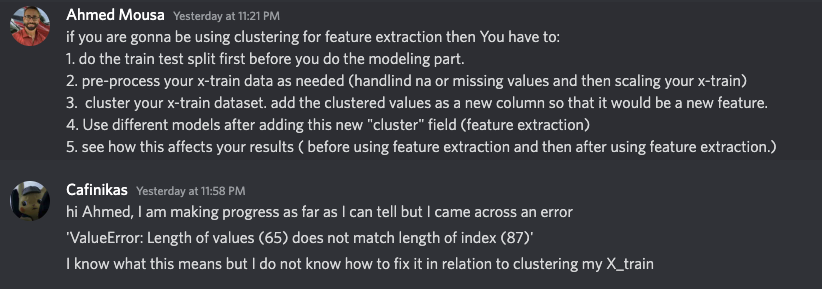

## To whomever is assessing resubmits, as you can tell by the screenshot above I was working with Ahmed to reconcile some of the points of feedback I got from last week. All my cells run except for 35, 36, 37 because of the error I mentioned above, so I hope this is sufficient for the time being since I know what steps to take, I just have to work them out. Ahmed and I are looking to meet again either tomorrow or during the weekend to make sure my notebook is clean before my presentation next week.

In [23]:
y = dfml['Next WAR']
X = dfml.drop(columns = ['Next WAR'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X = scaler.transform(X_train)
scaled_X[:5]

array([[-1.00495788, -0.99785957, -0.3056691 , -0.50517383, -0.84502985,
        -0.65044042,  0.75021607],
       [ 0.87372291,  0.83246898, -0.07712034,  0.13353168,  0.55092179,
         0.08781261, -0.74549477],
       [ 0.16186787,  0.1036291 , -0.14412203, -1.22641341, -0.70893567,
        -1.34490204, -0.66864719],
       [-1.33833666, -1.2764645 , -0.146941  , -0.40321747, -0.95693351,
        -0.21246922, -0.58343064],
       [-0.3656013 , -0.43594753, -1.76193872, -1.32156541, -0.95017517,
        -1.38428671, -0.52615115]])

In [26]:
def evaluate_regression(y_true, y_pred, name='model'):
  scores = pd.DataFrame(index=['R2','MAE','RMSE'],
                        columns=[name])
  scores.loc['R2', name] = r2_score(y_true, y_pred)
  scores.loc['MAE', name] = mean_absolute_error(y_true, y_pred)
  scores.loc['RMSE', name] = np.sqrt(mean_squared_error(y_true, y_pred))
  return scores

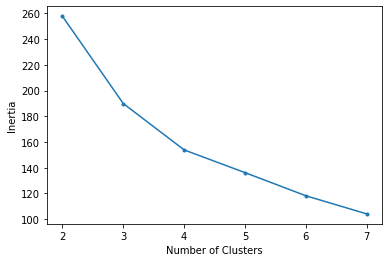

In [27]:
ks = range(2,8) 
inertias = []

for k in ks:
   kmeans = KMeans(n_clusters=k, random_state=42)
   kmeans.fit(scaled_X)
   inertias.append(kmeans.inertia_)

plt.plot(ks, inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

## Inertia seems to change around 3, so 3 clusters is a good start to consider

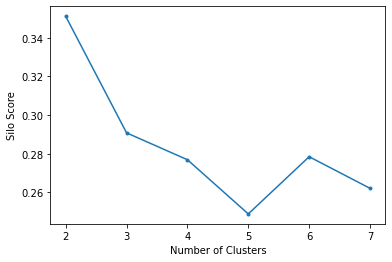

In [28]:
ks = range(2,8)
sil = []

for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_X)
  sil.append(silhouette_score(scaled_X, kmeans.labels_))

plt.plot(ks, sil, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silo Score')
plt.show()

## the silouhette score says 2 clusters is better so I will create a score to help deicde

In [29]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(scaled_X)
silhouette_score(scaled_X, kmeans.labels_)

## 2.6 when rounded leans closer to 3 so lets create 3 clusters

0.2620951160369304

In [34]:
km3 = KMeans(n_clusters = 3, random_state = 42)
km3.fit(scaled_X)

KMeans(n_clusters=3, random_state=42)

In [35]:
dfml['clusters'] = km3.labels_

plt.scatter(dfml['war_total'], dfml['Next WAR'], c = dfml['cluster'])
plt.xlabel("Current Wins Above Replacement")
plt.ylabel("Next Year's WAR")
plt.show()

ValueError: ignored

In [36]:
cluster_groups = dfml.groupby('clusters', as_index=False).mean()
cluster_groups

KeyError: ignored

NameError: ignored

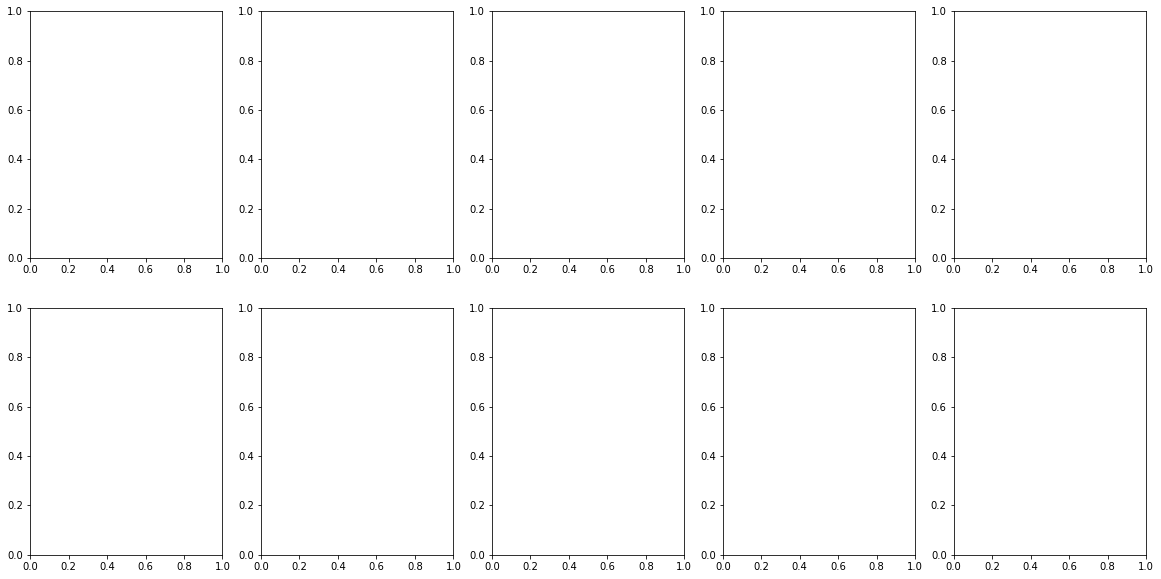

In [37]:
fig, axes = plt.subplots(2,5, figsize = (20, 10))

axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster2'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [38]:
pca = PCA(n_components = .98)
knn = KNeighborsRegressor()

In [39]:
knn_pca_pipe = make_pipeline(pca, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.98)),
                ('kneighborsregressor', KNeighborsRegressor())])

In [41]:
def evaluate_model(y_true, y_pred):
  
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mse)
  print(f'MAE {mae}\n MSE {mse}\n R^2 {r2}\n RMSE{rmse}')

In [42]:
knn_pca_pipe_trainpreds = knn_pca_pipe.predict(X_train)
knn_pca_pipe_testpreds = knn_pca_pipe.predict(X_test)

In [43]:
print('Training Data')
evaluate_model(y_train, knn_pca_pipe_trainpreds)
print('\n')
print('Test Data')
evaluate_model(y_test, knn_pca_pipe_testpreds)

Training Data
MAE 3.8492628622615737
 MSE 24.140455881165767
 R^2 0.31745813627511543
 RMSE4.913293791456579


Test Data
MAE 3.6590481193801554
 MSE 21.422573622426555
 R^2 0.13412962840461662
 RMSE4.6284526164179915


In [44]:
knn_pipe = make_pipeline(scaler, KNeighborsRegressor())
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [45]:
pred_no_pca = knn_pipe.predict(X_test)
pred_no_pca

array([ 5.12275928, 11.2156362 ,  9.25794407, 13.55004382,  5.19038434,
        5.8937194 ,  7.35356301, 17.87469417,  8.9965112 ,  6.86338629,
        7.16557092,  4.65952033,  3.48923758, 16.30411404,  5.94320738,
        3.64887707, 12.76125026,  9.69976954, 10.654875  ,  6.52305851,
        6.25339386,  6.5721706 ])

In [46]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score

0.4815481705734197

In [47]:
d_tree = DecisionTreeRegressor(random_state = 42)
d_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [48]:
dtrain_pred = d_tree.predict(X_train)
dtest_pred = d_tree.predict(X_test)

In [49]:
print('Training Data')
evaluate_model(y_train, dtrain_pred)
print('\n')
print('Test Data')
evaluate_model(y_test, dtest_pred )

Training Data
MAE 0.0
 MSE 0.0
 R^2 1.0
 RMSE0.0


Test Data
MAE 4.925481379097912
 MSE 44.03066230291112
 R^2 -0.7796575986510279
 RMSE6.635560436233787


In [50]:
dtrain_score = d_tree.score(X_train, y_train)
dtest_score = d_tree.score(X_test, y_test)
print(dtrain_score)
print(dtest_score)

1.0
-0.7796575986510279


In [51]:
d_tree.get_depth()

10

In [52]:
d_tree_15 = DecisionTreeRegressor(max_depth = 15, random_state = 42)
d_tree_15.fit(X_train, y_train)
dtrain_15_score = d_tree_15.score(X_train, y_train)
dtest_15_score = d_tree_15.score(X_test, y_test)
print(dtrain_15_score)
print(dtest_15_score)

1.0
-0.7796575986510279


In [53]:
d_tree_9 = DecisionTreeRegressor(max_depth = 9, random_state = 42)
d_tree_9.fit(X_train, y_train)
dtrain_9_score = d_tree_9.score(X_train, y_train)
dtest_9_score = d_tree_9.score(X_test, y_test)
print(dtrain_9_score)
print(dtest_9_score)

0.9997834343682399
-0.9460055284803184


In [54]:
d_tree_5 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
d_tree_5.fit(X_train, y_train)
dtrain_5_score = d_tree_5.score(X_train, y_train)
dtest_5_score = d_tree_5.score(X_test, y_test)
print(dtrain_5_score)
print(dtest_5_score)


0.8990070865379043
0.06387577313017756


## Ignore this
# In comparison to the PCA and KNN without PCA, it can be seen that a Decision Tree Regression yields the least amount of overfitting.